# EDA and Data Pre-processing

## Importing Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import csv
import datetime as dt

## Importing Dataset

In [18]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Pre-processing on Train Dataset

## Feature Engineering to Create "dist_mrt" from Auxiliary Data

In [19]:
# do not change order of this .dropna() function
train.dropna()
train = train.reset_index(drop=True)
train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0


In [20]:
with open('./auxiliary-data/distance-to-mrt.csv', newline='') as f:
    reader = csv.reader(f)
    mrt_list = list(reader)

In [21]:
train['dist_mrt'] = np.array(mrt_list).astype(float)
train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005


## Convert Date to DateTime Format

In [22]:
train['month'] = pd.to_datetime(train['month'])
train['datetime_month']= train['month'].map(dt.datetime.toordinal)

## Convert "storey_range" into Numerical Data Type "storey_average"

In [23]:
# first number in "storey_range"
train['lower'] = train['storey_range'].str.extract('(\d+)').astype(str).astype(int)
train['upper'] = train['storey_range'].str.extract('(\d+$)').astype(str).astype(int)
# calculate average storey from the range
train['storey_average'] = train['upper'] + train['lower']
train['storey_average'] = train['storey_average'] / 2.0
train = train.drop(columns=['storey_range', 'lower', 'upper'])
train.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt,datetime_month,storey_average
0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651,730698,2.0
1,2014-10-01,punggol,5-room,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453,735507,11.0
2,2020-09-01,sengkang,5 room,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542,737669,2.0
3,2000-10-01,clementi,3 room,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346,730394,8.0
4,2013-01-01,bukit batok,3-room,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005,734869,8.0


## Convert "flat_type" to Ordinal Data Type "flattype_mapping"

In [24]:
train = train.replace(to_replace ="5 room", value ="5-room")
train = train.replace(to_replace ="4 room", value ="4-room")
train = train.replace(to_replace ="3 room", value ="3-room")
train = train.replace(to_replace ="2 room", value ="2-room")
train = train.replace(to_replace ="1 room", value ="1-room")
flattype_mapping={"1-room": 1,
                   "2-room": 2,
                   "3-room": 3,
                   "4-room": 4,
                   "5-room": 5,
                   "multi generation": 6,
                   "executive": 7,}
train["flattype_mapping"] = train['flat_type'].map(flattype_mapping)
train = train.drop(columns=['flat_type'])
train.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt,datetime_month,storey_average,flattype_mapping
0,2001-08-01,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651,730698,2.0,4
1,2014-10-01,punggol,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453,735507,11.0,5
2,2020-09-01,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542,737669,2.0,5
3,2000-10-01,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346,730394,8.0,3
4,2013-01-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005,734869,8.0,3


## Convert "region" to Binary Data Type

In [25]:
train = pd.get_dummies(train, columns=['region'], prefix=['region'])
train

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,...,resale_price,dist_mrt,datetime_month,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2001-08-01,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,...,209700.0,1.137651,730698,2.0,4,0,1,0,0,0
1,2014-10-01,punggol,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,...,402300.0,0.118453,735507,11.0,5,0,0,0,1,0
2,2020-09-01,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,...,351000.0,0.479542,737669,2.0,5,0,0,0,1,0
3,2000-10-01,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,...,151200.0,0.421346,730394,8.0,3,0,0,0,0,1
4,2013-01-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,...,318600.0,0.775005,734869,8.0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03-01,woodlands,537,Woodlands Drive 16,101.0,model a,uncategorized,2000,1.429658,103.792583,...,238500.0,0.300402,732006,2.0,4,0,0,1,0,0
431728,2016-04-01,sengkang,410A,fernvale road,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,...,376200.0,0.206723,736055,14.0,4,0,0,0,1,0
431729,2011-01-01,tampines,829,tampines street 81,67.0,new generation,uncategorized,1986,1.349224,103.934913,...,255600.0,0.567511,734138,2.0,3,0,1,0,0,0
431730,2013-05-01,sengkang,233,compassvale walk,123.0,improved,uncategorized,1999,1.389941,103.900721,...,508500.0,0.503935,734989,17.0,5,0,0,0,1,0


## Feature engineering to create "remaining_lease" feature from "lease_commencement_date"

In [26]:
lease_commence_date = train['lease_commence_date'].to_numpy()
#assuming 99-year lease, we calculate the remaining years on the lease
remaining_lease = lease_commence_date + 99 - pd.DatetimeIndex(train['month']).year.to_numpy()
train['remaining_lease'] = remaining_lease
train = train.drop(columns=['lease_commence_date'])
train.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,dist_mrt,datetime_month,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08-01,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1.369008,103.958697,0.0,...,1.137651,730698,2.0,4,0,1,0,0,0,87
1,2014-10-01,punggol,196B,punggol field,110.0,improved,uncategorized,1.399007,103.906991,0.0,...,0.118453,735507,11.0,5,0,0,0,1,0,88
2,2020-09-01,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,1.388348,103.873815,0.0,...,0.479542,737669,2.0,5,0,0,0,1,0,83
3,2000-10-01,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1.318493,103.766702,0.0,...,0.421346,730394,8.0,3,0,0,0,0,1,79
4,2013-01-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1.348149,103.742658,0.0,...,0.775005,734869,8.0,3,0,0,0,0,1,71


## Convert "flat_model" to Ordinal Data Type

In [27]:
flat_models = train.groupby('flat_model')
keys = flat_models.groups.keys()

flat_type_dict = {}

# store the average "resale_price" of each "flat_model" in a dictionary with
#    key : "flat_model"
#    value : average "resale_price"
for key in keys:
    df_i = flat_models.get_group(key)
    flat_type_dict.update({key : df_i["resale_price"].mean()})

# ordering the different "flat_model" by average "resale_price" (ascending order)
{k: v for k, v in sorted(flat_type_dict.items(), key=lambda item: item[1])}
# print(flat_type_dict)
# print(flat_type_dict.keys())

# save the ordered list of keys from dictionary as a list for easier index finding
flat_model_list = list(flat_type_dict.keys())
print(flat_model_list)

for flat_model in flat_model_list:
    ordinal_value = flat_model_list.index(flat_model) + 1
    train['flat_model'] = train['flat_model'].str.replace(rf'^{flat_model}$', str(ordinal_value), regex=True)
    
train['flat_model'] = np.array(train['flat_model']).astype(str).astype(int)
train.head()

['2-room', 'adjoined flat', 'apartment', 'dbss', 'improved', 'improved maisonette', 'maisonette', 'model a', 'model a maisonette', 'model a2', 'multi generation', 'new generation', 'premium apartment', 'premium apartment loft', 'premium maisonette', 'simplified', 'standard', 'terrace', 'type s1', 'type s2']


,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,dist_mrt,datetime_month,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08-01,pasir ris,440,pasir ris drive 4,118.0,8,uncategorized,1.369008,103.958697,0.0,...,1.137651,730698,2.0,4,0,1,0,0,0,87
1,2014-10-01,punggol,196B,punggol field,110.0,5,uncategorized,1.399007,103.906991,0.0,...,0.118453,735507,11.0,5,0,0,0,1,0,88
2,2020-09-01,sengkang,404A,fernvale lane,112.0,13,uncategorized,1.388348,103.873815,0.0,...,0.479542,737669,2.0,5,0,0,0,1,0,83
3,2000-10-01,clementi,375,clementi avenue 4,67.0,12,uncategorized,1.318493,103.766702,0.0,...,0.421346,730394,8.0,3,0,0,0,0,1,79
4,2013-01-01,bukit batok,163,bukit batok street 11,73.0,8,uncategorized,1.348149,103.742658,0.0,...,0.775005,734869,8.0,3,0,0,0,0,1,71


## Drop Columns "block", "street_name", and "eco_category"

In [28]:
train = train.drop(columns=['block', 'street_name', 'eco_category'])
train.head()

,month,town,floor_area_sqm,flat_model,latitude,longitude,elevation,subzone,planning_area,resale_price,dist_mrt,datetime_month,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08-01,pasir ris,118.0,8,1.369008,103.958697,0.0,pasir ris drive,pasir ris,209700.0,1.137651,730698,2.0,4,0,1,0,0,0,87
1,2014-10-01,punggol,110.0,5,1.399007,103.906991,0.0,punggol field,punggol,402300.0,0.118453,735507,11.0,5,0,0,0,1,0,88
2,2020-09-01,sengkang,112.0,13,1.388348,103.873815,0.0,fernvale,sengkang,351000.0,0.479542,737669,2.0,5,0,0,0,1,0,83
3,2000-10-01,clementi,67.0,12,1.318493,103.766702,0.0,clementi north,clementi,151200.0,0.421346,730394,8.0,3,0,0,0,0,1,79
4,2013-01-01,bukit batok,73.0,8,1.348149,103.742658,0.0,bukit batok west,bukit batok,318600.0,0.775005,734869,8.0,3,0,0,0,0,1,71


## Drop Columns "elevation", "town", "subzone" and "planning_area"

In [29]:
train = train.drop(columns=['elevation','town','subzone','planning_area'])
train.head()

,month,floor_area_sqm,flat_model,latitude,longitude,resale_price,dist_mrt,datetime_month,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08-01,118.0,8,1.369008,103.958697,209700.0,1.137651,730698,2.0,4,0,1,0,0,0,87
1,2014-10-01,110.0,5,1.399007,103.906991,402300.0,0.118453,735507,11.0,5,0,0,0,1,0,88
2,2020-09-01,112.0,13,1.388348,103.873815,351000.0,0.479542,737669,2.0,5,0,0,0,1,0,83
3,2000-10-01,67.0,12,1.318493,103.766702,151200.0,0.421346,730394,8.0,3,0,0,0,0,1,79
4,2013-01-01,73.0,8,1.348149,103.742658,318600.0,0.775005,734869,8.0,3,0,0,0,0,1,71


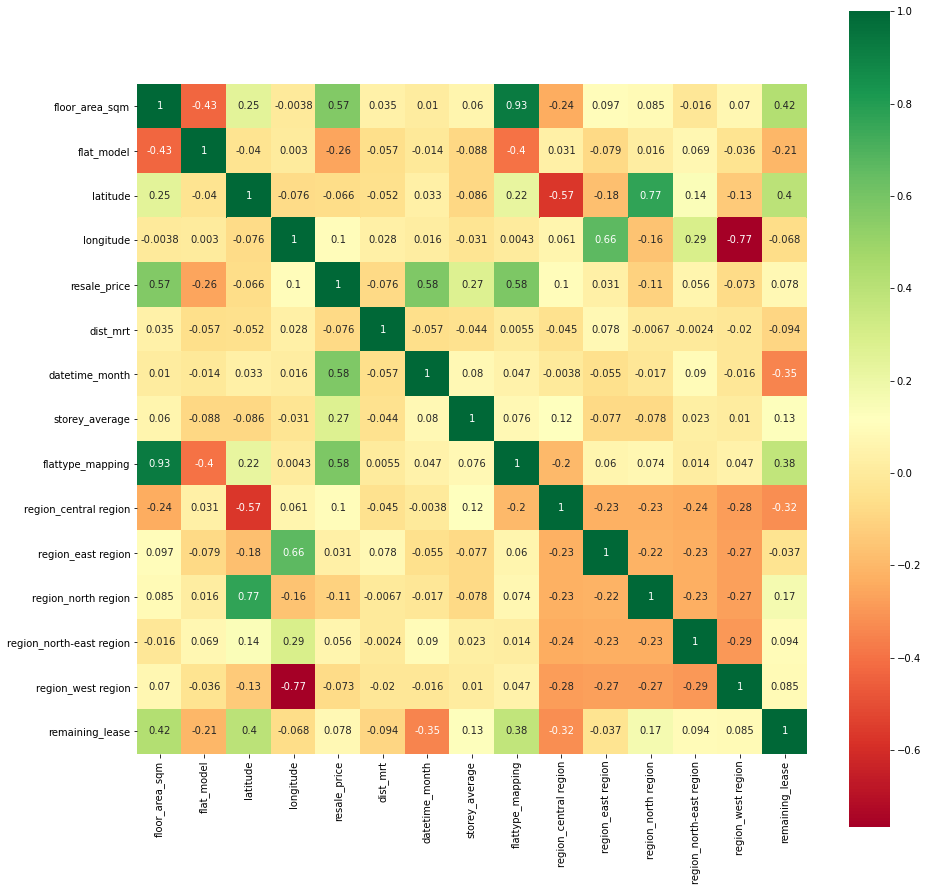

In [30]:
import seaborn as sns
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, square=True, cmap="RdYlGn");

## Pre-processing on Test Dataset

## Feature Engineering to Create "dist_mrt" from Auxiliary Data

In [31]:
test.dropna()
test = test.reset_index(drop=True)
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region
107931,2000-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region
107932,2009-07,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region


In [32]:
with open('./auxiliary-data/distance-to-mrt-test-edited.csv', newline='') as f:
    reader = csv.reader(f)
    mrt_list = list(reader)

In [33]:
test['dist_mrt'] = np.array(mrt_list).astype(float)
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682
107931,2000-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181
107932,2009-07,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997


## Convert Date to DateTime Format

In [34]:
test['month'] = pd.to_datetime(test['month'])

## Convert "storey_range" into Numerical Data Type "storey_average" 

In [35]:
test['lower'] = test['storey_range'].str.extract('(\d+)').astype(str).astype(int)
test['upper'] = test['storey_range'].str.extract('(\d+$)').astype(str).astype(int)
# calculate average storey from the range
test['storey_average'] = test['upper'] + test['lower']
test['storey_average'] = test['storey_average'] / 2.0
test = test.drop(columns=['storey_range', 'lower', 'upper'])
test

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt,storey_average
0,2004-01-01,bukit batok,4 room,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554,5.0
1,2001-11-01,tampines,5 room,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025,5.0
2,2002-07-01,jurong east,3 room,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380,2.0
3,2015-04-01,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114,5.0
4,2004-04-01,clementi,5 room,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,hougang,5 room,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624,11.0
107930,2006-01-01,kallang/whampoa,4 room,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682,14.0
107931,2000-01-01,kallang/whampoa,3 room,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181,8.0
107932,2009-07-01,jurong west,4 room,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997,11.0


## Convert "flat_type" to Ordinal Data Type "flattype_mapping"

In [36]:
test = test.replace(to_replace ="5 room", value ="5-room")
test = test.replace(to_replace ="4 room", value ="4-room")
test = test.replace(to_replace ="3 room", value ="3-room")
test = test.replace(to_replace ="2 room", value ="2-room")
test = test.replace(to_replace ="1 room", value ="1-room")
flattype_mapping={"1-room": 1,
                   "2-room": 2,
                   "3-room": 3,
                   "4-room": 4,
                   "5-room": 5,
                   "multi generation": 6,
                   "executive": 7,}
test["flattype_mapping"] = test['flat_type'].map(flattype_mapping)
test = test.drop(columns=['flat_type'])
test

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt,storey_average,flattype_mapping
0,2004-01-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554,5.0,4
1,2001-11-01,tampines,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025,5.0,5
2,2002-07-01,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380,2.0,3
3,2015-04-01,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114,5.0,3
4,2004-04-01,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,hougang,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624,11.0,5
107930,2006-01-01,kallang/whampoa,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682,14.0,4
107931,2000-01-01,kallang/whampoa,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181,8.0,3
107932,2009-07-01,jurong west,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997,11.0,4


## Convert "region" to Binary Data Type

In [37]:
test = pd.get_dummies(test, columns=['region'], prefix=['region'])
test

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,...,subzone,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2004-01-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,...,bukit batok west,bukit batok,0.667554,5.0,4,0,0,0,0,1
1,2001-11-01,tampines,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,...,tampines east,tampines,0.767025,5.0,5,0,1,0,0,0
2,2002-07-01,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,...,toh guan,jurong east,0.515380,2.0,3,0,0,0,0,1
3,2015-04-01,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,...,yio chu kang east,ang mo kio,0.547114,5.0,3,0,0,0,1,0
4,2004-04-01,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,...,clementi north,clementi,0.516298,2.0,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,hougang,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,...,trafalgar,hougang,1.221624,11.0,5,0,0,0,1,0
107930,2006-01-01,kallang/whampoa,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,...,boon keng,kallang,0.346682,14.0,4,1,0,0,0,0
107931,2000-01-01,kallang/whampoa,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,...,city hall,downtown core,0.221181,8.0,3,1,0,0,0,0
107932,2009-07-01,jurong west,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,...,yunnan,jurong west,1.138997,11.0,4,0,0,0,0,1


## Feature engineering to create "remaining_lease" feature from "lease_commencement_date"

In [38]:
lease_commence_date = test['lease_commence_date'].to_numpy()
#assuming 99-year lease, we calculate the remaining years on the lease
remaining_lease = lease_commence_date + 99 - pd.DatetimeIndex(test['month']).year.to_numpy()
test['remaining_lease'] = remaining_lease
test = test.drop(columns=['lease_commence_date'])
test.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1.346581,103.744085,0.0,...,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11-01,tampines,366,tampines street 34,122.0,improved,uncategorized,1.357618,103.961379,0.0,...,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07-01,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1.337804,103.741998,0.0,...,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04-01,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1.380084,103.849574,0.0,...,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04-01,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1.313960,103.769831,0.0,...,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Convert "flat_model" to Ordinal Data Type

In [39]:
# uses the same "flat_model_list" extracted from the "flat_model" dictionary calculated from train dataset
for flat_model in flat_model_list:
    ordinal_value = flat_model_list.index(flat_model) + 1
    test['flat_model'] = test['flat_model'].str.replace(rf'^{flat_model}$', str(ordinal_value), regex=True)
test['flat_model'] = np.array(test['flat_model']).astype(str).astype(int)
test.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01-01,bukit batok,186,bukit batok west avenue 6,94.0,12,uncategorized,1.346581,103.744085,0.0,...,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11-01,tampines,366,tampines street 34,122.0,5,uncategorized,1.357618,103.961379,0.0,...,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07-01,jurong east,206,jurong east street 21,67.0,12,uncategorized,1.337804,103.741998,0.0,...,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04-01,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,12,uncategorized,1.380084,103.849574,0.0,...,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04-01,clementi,356,clementi avenue 2,117.0,17,uncategorized,1.313960,103.769831,0.0,...,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Drop Columns "block", "street_name", and "eco_category"

In [40]:
test = test.drop(columns=['block', 'street_name', 'eco_category'])
test.head()

,month,town,floor_area_sqm,flat_model,latitude,longitude,elevation,subzone,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01-01,bukit batok,94.0,12,1.346581,103.744085,0.0,bukit batok west,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11-01,tampines,122.0,5,1.357618,103.961379,0.0,tampines east,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07-01,jurong east,67.0,12,1.337804,103.741998,0.0,toh guan,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04-01,ang mo kio,82.0,12,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04-01,clementi,117.0,17,1.313960,103.769831,0.0,clementi north,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Drop Columns "elevation", "town", "subzone" and "planning_area"

In [41]:
test = test.drop(columns=['elevation','town','subzone','planning_area'])
test.head()

,month,floor_area_sqm,flat_model,latitude,longitude,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01-01,94.0,12,1.346581,103.744085,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11-01,122.0,5,1.357618,103.961379,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07-01,67.0,12,1.337804,103.741998,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04-01,82.0,12,1.380084,103.849574,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04-01,117.0,17,1.313960,103.769831,0.516298,2.0,5,0,0,0,0,1,73


In [42]:
test

,month,floor_area_sqm,flat_model,latitude,longitude,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01-01,94.0,12,1.346581,103.744085,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11-01,122.0,5,1.357618,103.961379,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07-01,67.0,12,1.337804,103.741998,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04-01,82.0,12,1.380084,103.849574,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04-01,117.0,17,1.313960,103.769831,0.516298,2.0,5,0,0,0,0,1,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,110.0,5,1.380452,103.879333,1.221624,11.0,5,0,0,0,1,0,94
107930,2006-01-01,102.0,8,1.314481,103.870458,0.346682,14.0,4,1,0,0,0,0,92
107931,2000-01-01,68.0,5,1.294924,103.854315,0.221181,8.0,3,1,0,0,0,0,78
107932,2009-07-01,104.0,8,1.339927,103.687354,1.138997,11.0,4,0,0,0,0,1,78
